In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

In [11]:
df = pd.read_excel('Volve production data.xlsx')

In [12]:
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'], format = '%d-%b-%y')

In [13]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [15]:
wells = df['WELL_BORE_CODE'].unique()
wells

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

In [17]:
data = df[df['WELL_BORE_CODE']=='NO 15/9-F-14 H']
data

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
4967,2008-02-12,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.00000,0.0,0.05885,0.0,0.0,0.0,NaN,production,OP
4968,2008-02-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.00000,0.0,0.06768,0.0,0.0,0.0,NaN,production,OP
4969,2008-02-14,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.00000,0.0,0.04950,0.0,0.0,0.0,NaN,production,OP
4970,2008-02-15,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.00000,0.0,0.06640,0.0,0.0,0.0,NaN,production,OP
4971,2008-02-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.00000,0.0,0.10479,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,2016-09-13,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,10.87335,0.0,8.89437,0.0,0.0,0.0,NaN,production,OP
8019,2016-09-14,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,10.87699,0.0,8.88767,0.0,0.0,0.0,NaN,production,OP
8020,2016-09-15,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,10.88277,0.0,8.85606,0.0,0.0,0.0,NaN,production,OP
8021,2016-09-16,NO 15/9-F-14 H,5351,15/9-F-14,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,10.87889,0.0,8.83878,0.0,0.0,0.0,NaN,production,OP


In [19]:
data.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

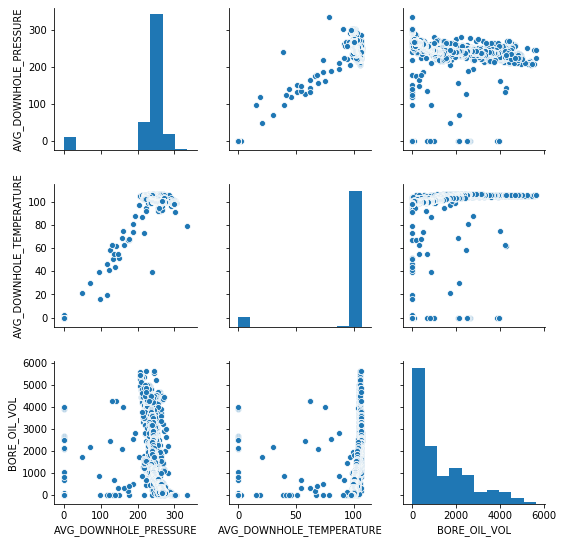

In [21]:
var = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'BORE_OIL_VOL']
sns.pairplot(data[var])

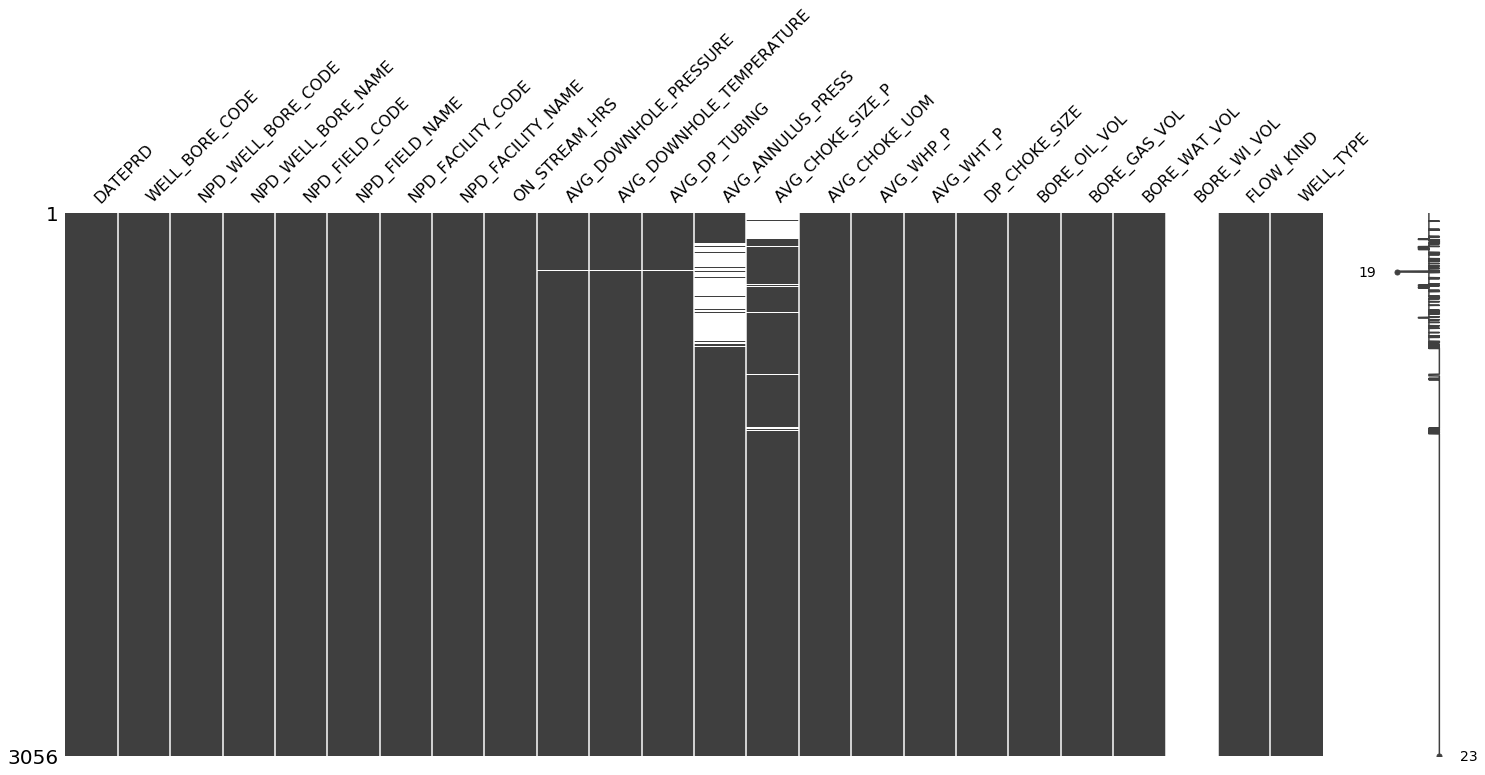

In [22]:
msno.matrix(data)

In [23]:
data = data.interpolate(method ='linear')

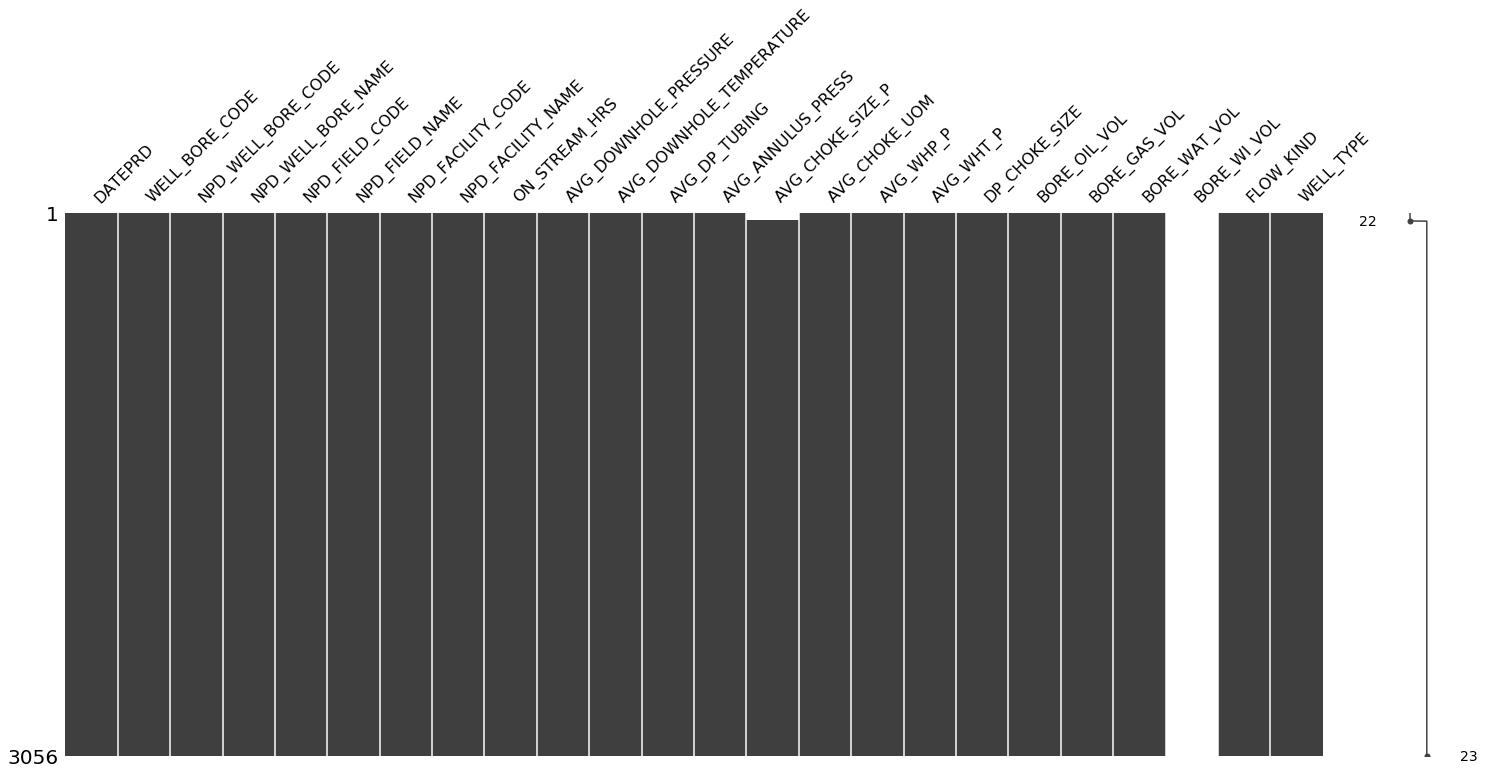

In [25]:
msno.matrix(data)

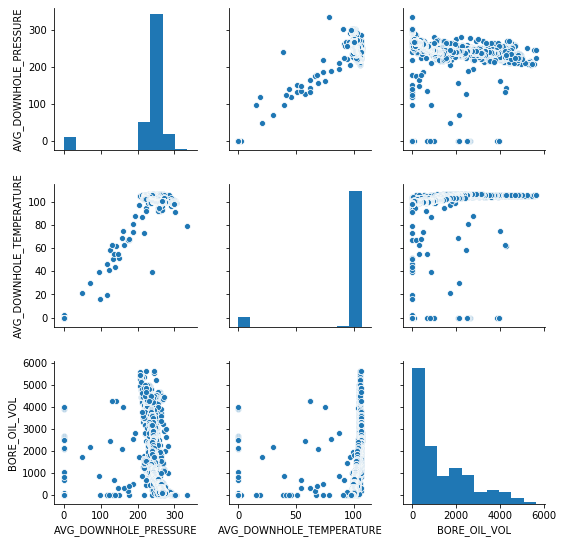

In [26]:
var = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'BORE_OIL_VOL']
sns.pairplot(data[var])